<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [ ]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [3]:
import requests

# URL of the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open('m2_survey_data.csv', 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully.


In [4]:
import pandas as pd

# Load the data from the downloaded file
df = pd.read_csv('m2_survey_data.csv')

# Print the first few rows of the DataFrame
print(df.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


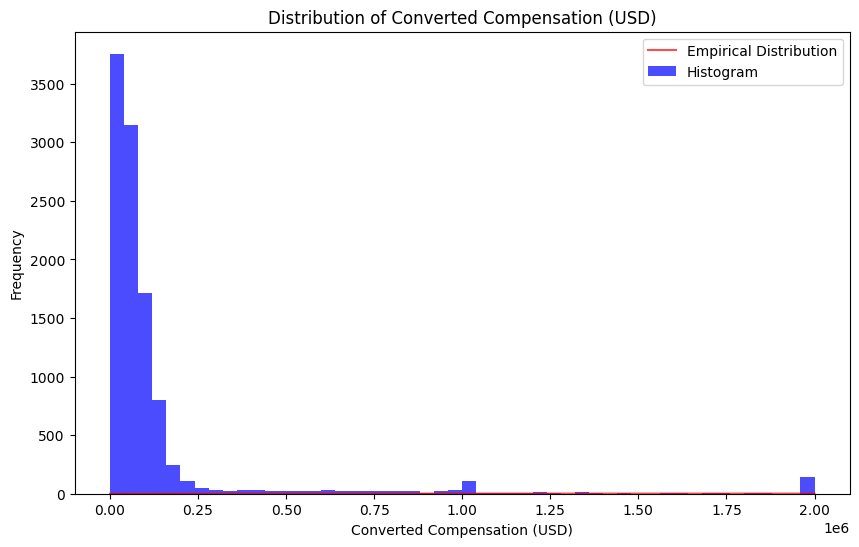

In [8]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_comp, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Converted Compensation (USD)')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')

# Plot empirical distribution function
sorted_data = sorted(converted_comp)
yvals = [i/len(sorted_data) for i in range(len(sorted_data))]
plt.plot(sorted_data, yvals, color='red', alpha=0.7)
plt.legend(["Empirical Distribution", "Histogram"])
plt.show()

Plot the histogram for the column `ConvertedComp`.


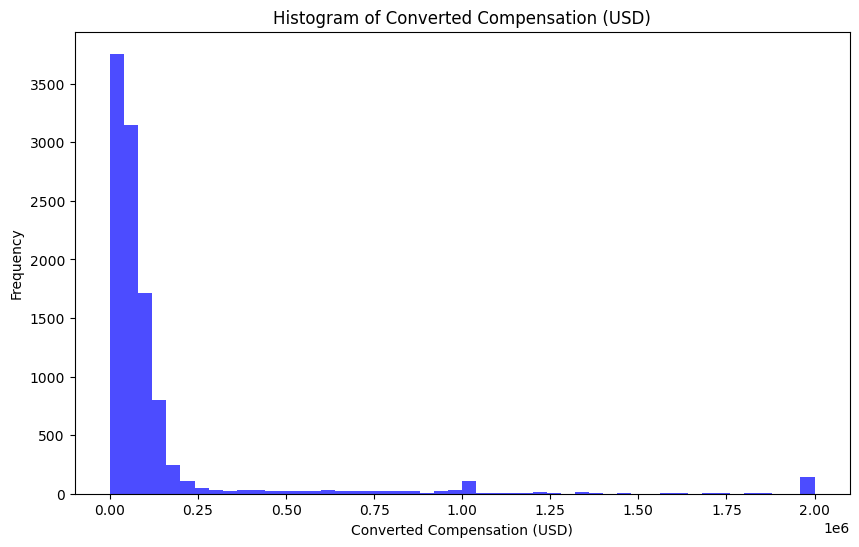

In [9]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(converted_comp, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Converted Compensation (USD)')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate the median of the 'ConvertedComp' column
median_converted_comp = converted_comp.median()

# Print the median value
print("The median of the 'ConvertedComp' column is:", median_converted_comp)

The median of the 'ConvertedComp' column is: 57745.0


How many responders identified themselves only as a **Man**?


In [11]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Count the number of respondents who identified themselves only as a 'Man'
num_men = df[df['Gender'] == 'Man'].shape[0]

# Print the number of respondents
print("Number of respondents who identified themselves only as a 'Man':", num_men)

Number of respondents who identified themselves only as a 'Man': 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [12]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Filter the DataFrame to include only respondents who identified as 'Woman'
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of the 'ConvertedComp' column for these respondents
median_converted_comp_women = women_df['ConvertedComp'].dropna().median()

# Print the median value
print("The median ConvertedComp of respondents who identified themselves only as a 'Woman' is:", median_converted_comp_women)

The median ConvertedComp of respondents who identified themselves only as a 'Woman' is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [13]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'Age' column
age_data = df['Age'].dropna()

# Compute the five-number summary
min_age = age_data.min()
q1_age = age_data.quantile(0.25)
median_age = age_data.median()
q3_age = age_data.quantile(0.75)
max_age = age_data.max()

# Print the five-number summary
print("Five-number summary for the 'Age' column:")
print("Minimum:", min_age)
print("First Quartile (Q1):", q1_age)
print("Median:", median_age)
print("Third Quartile (Q3):", q3_age)
print("Maximum:", max_age)

Five-number summary for the 'Age' column:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


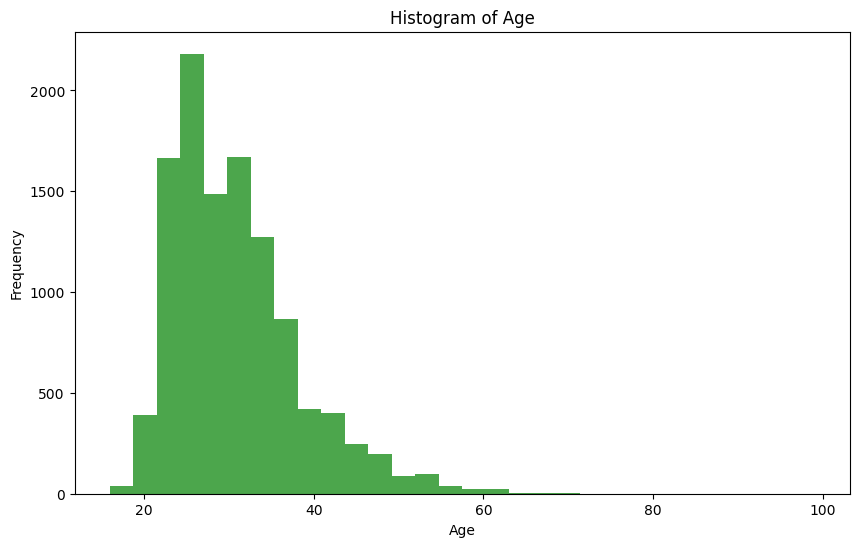

In [14]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'Age' column
age_data = df['Age'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [22]:
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'Age' column
age_data = df['Age'].dropna()

# Calculate the median age
median_age = age_data.median()

# Print the median age
print("The median age of the respondents is:", median_age)

The median age of the respondents is: 29.0


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [23]:
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate the median of the 'ConvertedComp' column
median_converted_comp = converted_comp.median()

# Print the median value
print("The median ConvertedComp before removing outliers is:", median_converted_comp)

The median ConvertedComp before removing outliers is: 57745.0


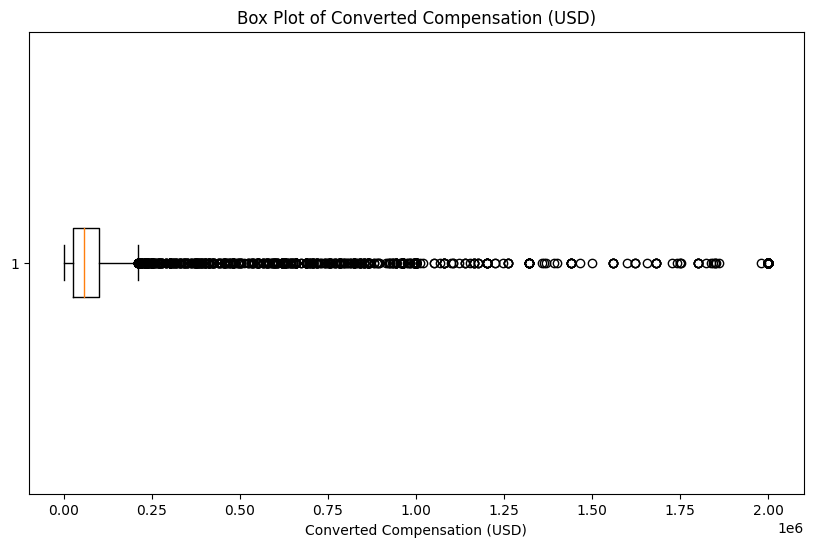

In [15]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(converted_comp, vert=False)
plt.title('Box Plot of Converted Compensation (USD)')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate Q1 and Q3
q1 = converted_comp.quantile(0.25)
q3 = converted_comp.quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Print the IQR
print("Interquartile Range (IQR) for 'ConvertedComp' column:", iqr)

Interquartile Range (IQR) for 'ConvertedComp' column: 73132.0


Find out the upper and lower bounds.


In [17]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate Q1 and Q3
q1 = converted_comp.quantile(0.25)
q3 = converted_comp.quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Print the results
print("First Quartile (Q1):", q1)
print("Third Quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73132.0
Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [18]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate Q1, Q3, and IQR
q1 = converted_comp.quantile(0.25)
q3 = converted_comp.quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = converted_comp[(converted_comp < lower_bound) | (converted_comp > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in the 'ConvertedComp' column:", num_outliers)

Number of outliers in the 'ConvertedComp' column: 879


In [24]:
import pandas as pd

# Load the DataFrame with outliers removed
df_no_outliers = pd.read_csv('m2_survey_data_no_outliers.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp_no_outliers = df_no_outliers['ConvertedComp'].dropna()

# Calculate the median of the 'ConvertedComp' column
median_converted_comp_no_outliers = converted_comp_no_outliers.median()

# Print the median value
print("The median ConvertedComp after removing outliers is:", median_converted_comp_no_outliers)

The median ConvertedComp after removing outliers is: 52704.0


In [26]:
import pandas as pd

# Load the DataFrame with outliers removed
df_no_outliers = pd.read_csv('m2_survey_data_no_outliers.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp_no_outliers = df_no_outliers['ConvertedComp'].dropna()

# Calculate the mean of the 'ConvertedComp' column
mean_converted_comp_no_outliers = converted_comp_no_outliers.mean()

# Print the mean value
print("The mean ConvertedComp after removing outliers is:", mean_converted_comp_no_outliers)

The mean ConvertedComp after removing outliers is: 59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'ConvertedComp' column
converted_comp = df['ConvertedComp'].dropna()

# Calculate Q1, Q3, and IQR
q1 = converted_comp.quantile(0.25)
q3 = converted_comp.quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the number of rows in the new DataFrame
print("Number of rows in the original DataFrame:", df.shape[0])
print("Number of rows in the new DataFrame without outliers:", df_no_outliers.shape[0])

# Save the new DataFrame to a CSV file
df_no_outliers.to_csv('m2_survey_data_no_outliers.csv', index=False)
print("New DataFrame with outliers removed saved successfully.")

Number of rows in the original DataFrame: 11398
Number of rows in the new DataFrame without outliers: 9703
New DataFrame with outliers removed saved successfully.


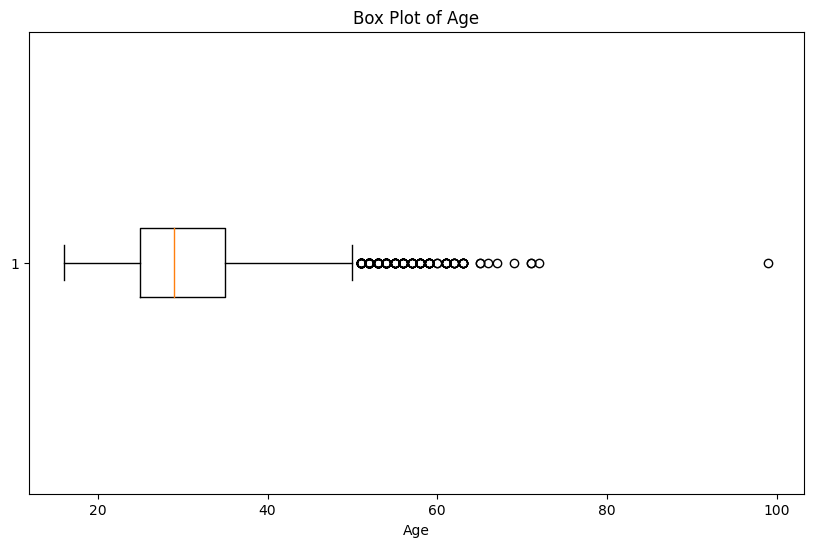

Number of outliers below Q1 in the 'Age' column: 0


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Drop missing values from the 'Age' column
age_data = df['Age'].dropna()

# Calculate Q1, Q3, and IQR
q1 = age_data.quantile(0.25)
q3 = age_data.quantile(0.75)
iqr = q3 - q1

# Calculate lower bound
lower_bound = q1 - 1.5 * iqr

# Identify outliers below Q1
outliers_below_q1 = age_data[age_data < lower_bound]

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Print the number of outliers below Q1
num_outliers_below_q1 = outliers_below_q1.shape[0]
print("Number of outliers below Q1 in the 'Age' column:", num_outliers_below_q1)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [21]:
# your code goes here
import pandas as pd

# Load the cleaned data from the saved file
df = pd.read_csv('m2_survey_data.csv')

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Get the correlation of 'Age' with other numerical columns
age_correlation = correlation_matrix['Age']

# Print the correlation values
print("Correlation of 'Age' with other numerical columns:")
print(age_correlation)

Correlation of 'Age' with other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
